In [15]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import librosa
import librosa.display
from scipy.io.wavfile import write

# Plot settings
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)

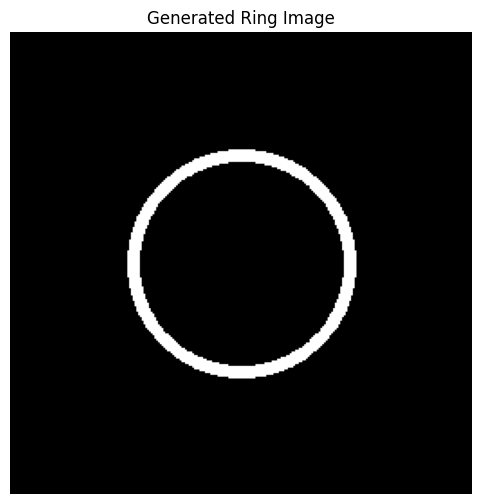

In [16]:
# Image: Ring shape
def generate_ring(size=256):
    img = np.zeros((size, size), dtype=np.uint8)
    cv2.circle(img, (size // 2, size // 2), 60, 255, thickness=5)
    cv2.imwrite('ring.png', img)
    return img

# Audio: 440 Hz and 880 Hz sine waves
def generate_harmonics(fs=44100, duration=3):
    t = np.linspace(0, duration, int(fs * duration), endpoint=False)
    y = 0.5 * np.sin(2 * np.pi * 440 * t) + 0.5 * np.sin(2 * np.pi * 880 * t)
    write('harmonics.wav', fs, (y * 32767).astype(np.int16))
    return y, fs

# Generate and load image
image = generate_ring()

# Display image
plt.imshow(image, cmap='gray')
plt.title("Generated Ring Image")
plt.axis("off")
plt.show()

# Generate audio
y, sr = generate_harmonics()

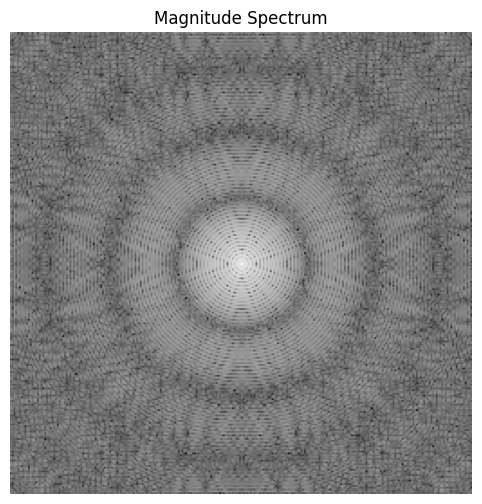

In [21]:
# Compute 2D FFT of the image
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)

magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum")
plt.axis("off")
plt.show()


In [22]:
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
r = 30  # filter radius

# Low-pass mask (center circle)
mask_lp = np.zeros((rows, cols), np.uint8)
cv2.circle(mask_lp, (ccol, crow), r, 1, thickness=-1)

# High-pass mask (complement of low-pass)
mask_hp = 1 - mask_lp

# Apply masks to the shifted FFT
fshift_lp = fshift * mask_lp
fshift_hp = fshift * mask_hp

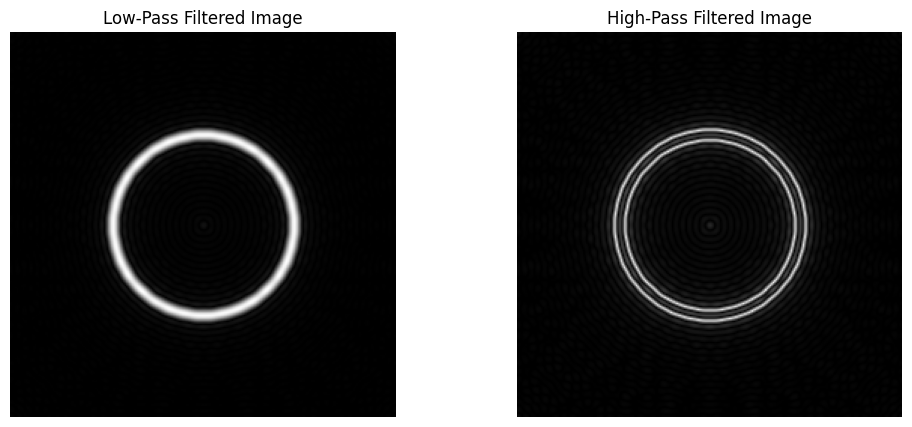

In [23]:
# Inverse FFT for low-pass filtered image
img_back_lp = np.abs(np.fft.ifft2(np.fft.ifftshift(fshift_lp)))

# Inverse FFT for high-pass filtered image
img_back_hp = np.abs(np.fft.ifft2(np.fft.ifftshift(fshift_hp)))

# Display results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_back_lp, cmap='gray')
plt.title("Low-Pass Filtered Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_back_hp, cmap='gray')
plt.title("High-Pass Filtered Image")
plt.axis("off")
plt.show()

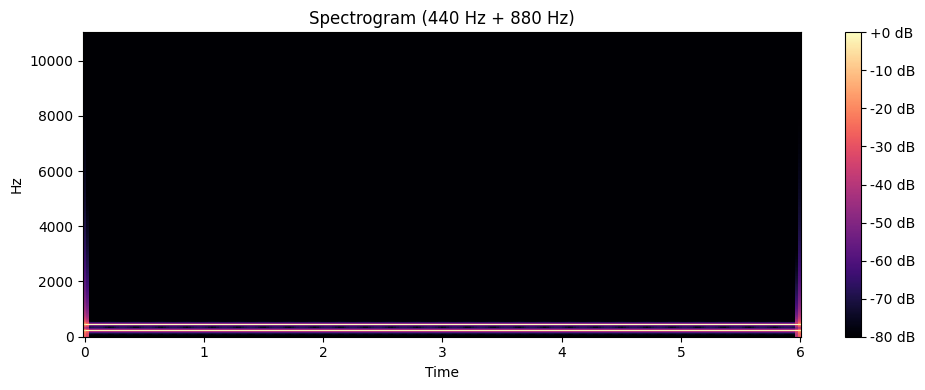

In [25]:
# Compute STFT and convert to decibels
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# Display spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram (440 Hz + 880 Hz)")
plt.tight_layout()
plt.show()


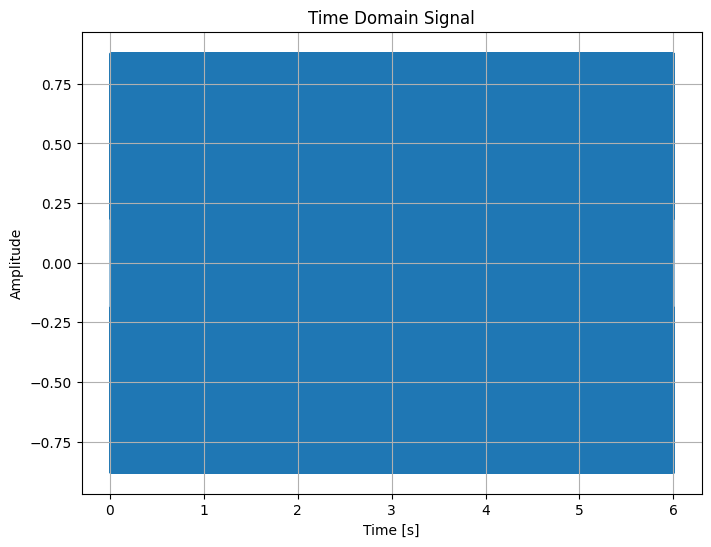

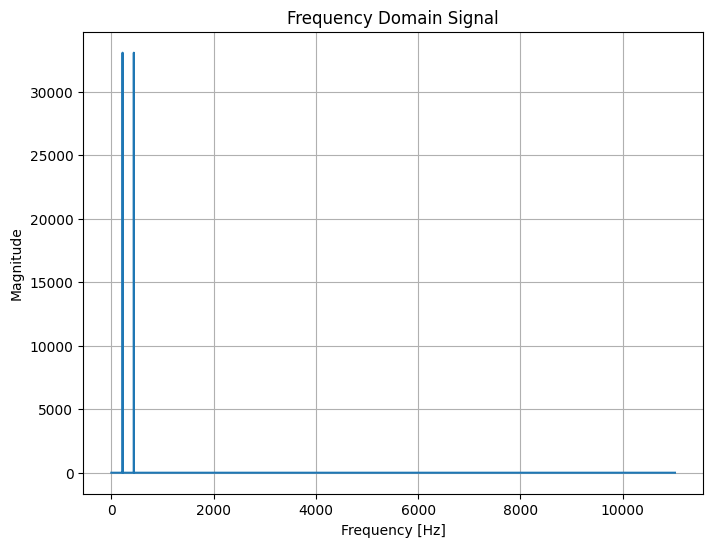

In [28]:
# Plot time-domain waveform
plt.figure()
librosa.display.waveshow(y, sr=sr)
plt.title("Time Domain Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()

# Compute and plot frequency-domain (FFT)
Y = np.fft.fft(y)
freqs = np.fft.fftfreq(len(Y), 1/sr)
plt.figure()
plt.plot(freqs[:len(freqs)//2], np.abs(Y[:len(Y)//2]))
plt.title("Frequency Domain Signal")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.grid()
plt.show()


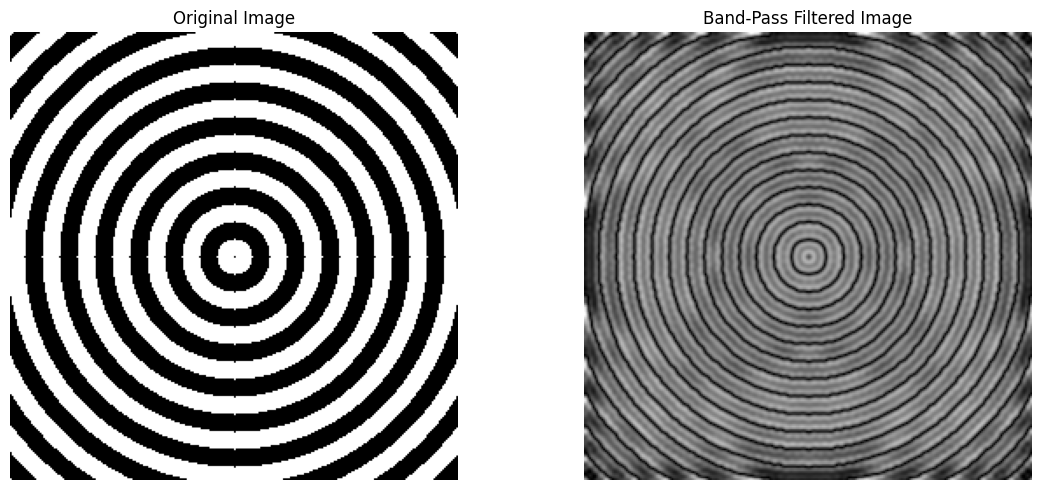

In [13]:
# Band-pass filter parameters
r1 = 10   # inner radius (removes low freq)
r2 = 60   # outer radius (removes high freq)

# Create band-pass mask (ring shape)
mask = np.zeros((rows, cols), dtype=np.float32)
cv2.circle(mask, (ccol, crow), r2, 1, thickness=-1)  # outer circle
cv2.circle(mask, (ccol, crow), r1, 0, thickness=-1)  # inner hole

# Apply band-pass filter to FFT
fshift_bp = fshift * mask
img_bandpass = np.abs(np.fft.ifft2(np.fft.ifftshift(fshift_bp)))

# Display original and filtered image
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_bandpass, cmap='gray')
plt.title("Band-Pass Filtered Image")
plt.axis("off")
plt.tight_layout()
plt.show()

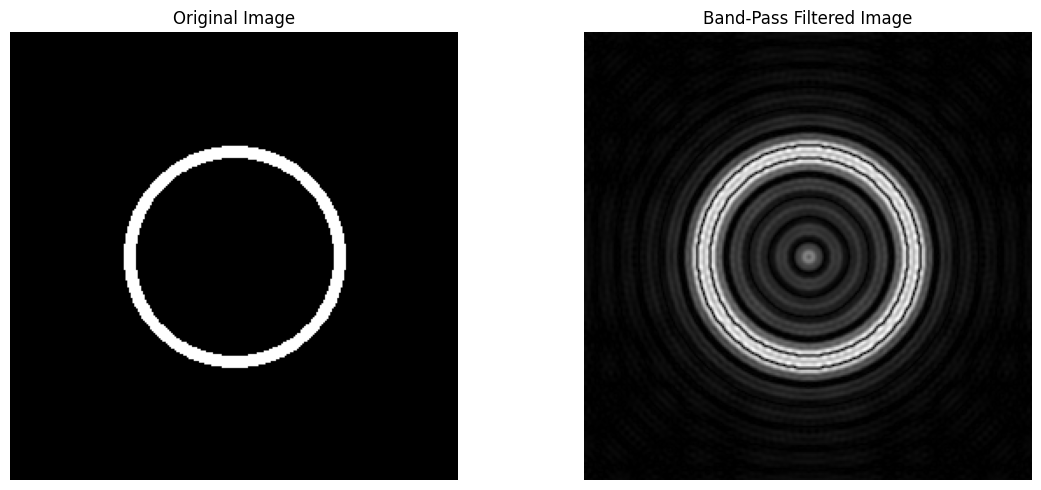

In [27]:
# Band-pass filter parameters
r1 = 10   # inner radius (removes low freq)
r2 = 60   # outer radius (removes high freq)

# Create band-pass mask (ring shape)
mask = np.zeros((rows, cols), dtype=np.float32)
cv2.circle(mask, (ccol, crow), r2, 1, thickness=-1)  # outer circle
cv2.circle(mask, (ccol, crow), r1, 0, thickness=-1)  # inner hole

# Apply band-pass filter to FFT
fshift_bp = fshift * mask
img_bandpass = np.abs(np.fft.ifft2(np.fft.ifftshift(fshift_bp)))

# Display original and filtered image
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_bandpass, cmap='gray')
plt.title("Band-Pass Filtered Image")
plt.axis("off")
plt.tight_layout()
plt.show()
